# 2. Ridge and Lasso Regression

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

boston = load_boston()
y_target = boston['target']
scaler = StandardScaler()
scaler.fit(boston['data'])
X_data = scaler.transform(boston['data'])

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size=0.4, random_state=123
)

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
avg_rmse

5.636831222559072

In [67]:
alphas = [0, 0.1, 1, 10, 100, 150, 200]

for al in alphas:

    ridge = Ridge(alpha=al)
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

    print(f'alpha={al} -> RMSE={np.around(avg_rmse, decimals=3)}')

alpha=0 -> RMSE=4.773
alpha=0.1 -> RMSE=4.773
alpha=1 -> RMSE=4.767
alpha=10 -> RMSE=4.736
alpha=100 -> RMSE=4.94
alpha=150 -> RMSE=5.116
alpha=200 -> RMSE=5.287


In [68]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.81950191,  0.60610157,  0.27358015,  0.15967025, -1.25999979,
        3.48161964, -0.29537442, -2.15837129,  1.71857245, -1.24106182,
       -1.85326165,  0.7659665 , -3.51369088])

In [69]:
ridge.intercept_

22.497182097081488

In [70]:
y_preds = ridge.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_preds))

5.11470062334564

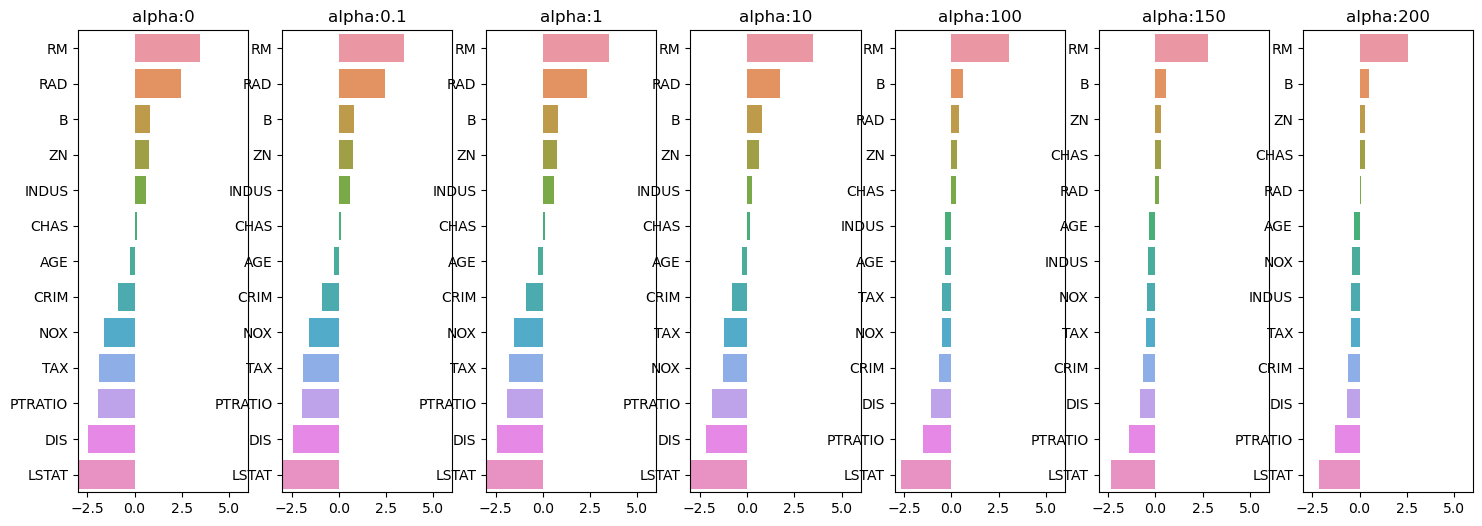

In [71]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=len(alphas))
coeff_df = pd.DataFrame()

for pos, al in enumerate(alphas):
    ridge = Ridge(alpha=al)
    ridge.fit ( X_train, y_train)
    coeff = pd.Series(data=ridge.coef_, index=boston['feature_names'])
    coeff = coeff.sort_values(ascending=False)
    colname = 'alpha:'+str(al)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot( x=coeff.values, y=coeff.index, ax=axs[pos])
    coeff_df[colname]=coeff
    

In [72]:
coeff_df

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:150,alpha:200
RM,3.465523,3.466009,3.469992,3.481620,3.050680,2.801238,2.585580
RAD,2.438099,2.427707,2.338278,1.718572,0.403760,0.216236,0.099829
B,0.790699,0.790413,0.787887,0.765967,0.614760,0.560854,0.520130
ZN,0.751255,0.749293,0.732260,0.606102,0.319837,0.295025,0.284891
INDUS,0.616092,0.611100,0.568187,0.273580,-0.318028,-0.389287,-0.427774
CHAS,0.113677,0.114320,0.119869,0.159670,0.266004,0.278047,0.279849
AGE,-0.236026,-0.236961,-0.244945,-0.295374,-0.321111,-0.313530,-0.310163
CRIM,-0.882955,-0.882086,-0.874563,-0.819502,-0.672679,-0.643338,-0.621132
NOX,-1.601263,-1.596824,-1.558077,-1.260000,-0.510261,-0.433281,-0.398251
TAX,-1.882414,-1.872585,-1.788562,-1.241062,-0.497607,-0.474921,-0.471778


In [73]:
from symbol import parameters
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1, 5, 10, 20, 50]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid=parameters, cv=3, scoring='neg_mean_squared_error', refit=True)
grid_ridge.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_ridge.cv_results_)
scores_df.iloc[:, 5:]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,{'alpha': 1},-26.086474,-18.943669,-29.537679,-24.855941,4.411645,4
1,{'alpha': 5},-26.165675,-18.110953,-29.669981,-24.648870,4.839305,3
2,{'alpha': 10},-26.312602,-17.399536,-29.821583,-24.511240,5.228798,2
3,{'alpha': 20},-26.678341,-16.520714,-30.162793,-24.453949,5.787200,1
4,{'alpha': 50},-28.016793,-15.654195,-31.520699,-25.063896,6.805693,5


In [74]:
grid_ridge.best_params_

{'alpha': 20}

In [75]:
grid_ridge.best_score_

-24.45394911532134

In [76]:
ridge_update = grid_ridge.best_estimator_
ridge_update.coef_

array([-0.78182422,  0.5199945 ,  0.09314729,  0.18683804, -1.04607033,
        3.46045183, -0.31896284, -1.93346354,  1.33238194, -0.94371002,
       -1.79107612,  0.74468604, -3.36307727])

In [77]:
y_pred = ridge_update.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

5.11470062334564

> Lasso

In [82]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.94060665, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -1.27855779])

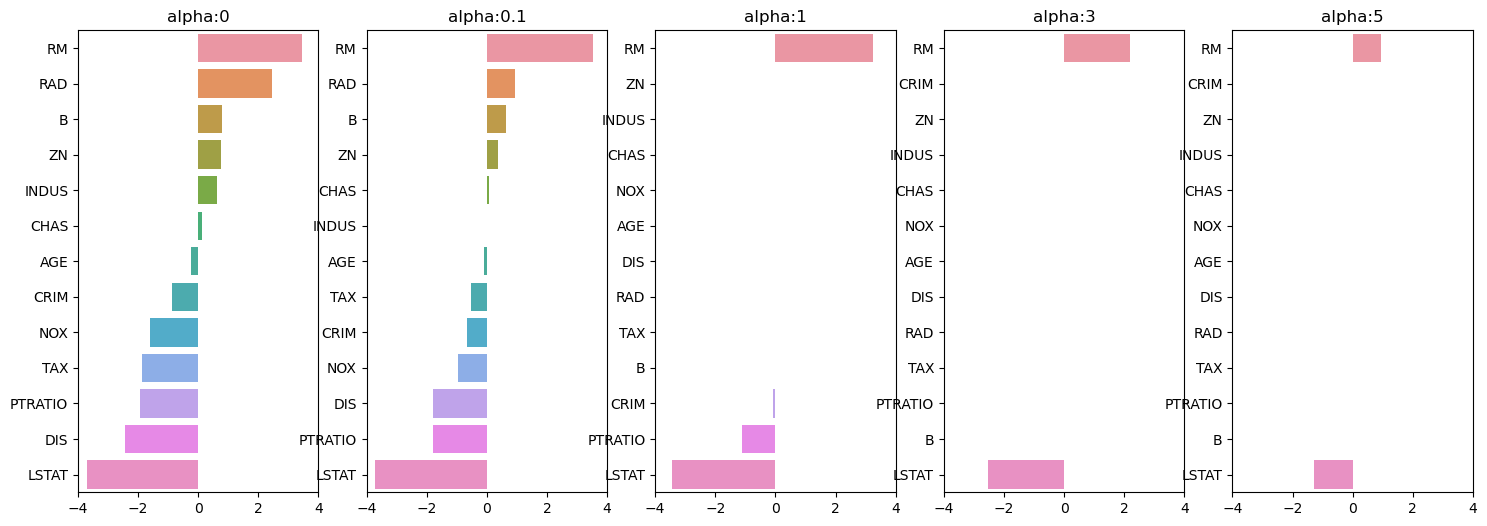

In [83]:
from sklearn.linear_model import Lasso
alphas = [0, 0.1, 1, 3, 5]
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=len(alphas))
coeff_df = pd.DataFrame()

for pos, al in enumerate(alphas):
    lasso = Lasso(alpha=al)
    lasso.fit(X_train, y_train)
    coeff = pd.Series(data=lasso.coef_, index=boston['feature_names'])
    coeff = coeff.sort_values(ascending=False)
    colname = 'alpha:'+str(al)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-4,4)
    sns.barplot( x=coeff.values, y=coeff.index, ax=axs[pos])
    coeff_df[colname]=coeff